<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سری سوم تمارین عملی درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر مریم امیر مزلقانی
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: پوریا جمیع  
</h5>
<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    <a href="mailto:Aut.DataMining.Fall@gmail.com">Aut.DataMining.Fall@gmail.com</a>
</p>

### Importing libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Read the training and test datasets and explain summary 


In [65]:
train_df = pd.read_csv("Adult_TrainDataset.csv")
test_df = pd.read_csv("Adult_TestDataset.csv")

train_df.describe()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Analyze the dataset using various methods, including creating different plots, to gain a general understanding of it.

#### Pair plot:
By examining the pair plot, we can gain valuable insights into the relationships between variables in the dataset. This visualization helps in understanding correlations, patterns, and distributions among different variables, offering a clearer picture of the data's characteristics and potential predictive features.


* dentifying Correlations: The scatterplots enable us to visually assess the relationships between different variables. For instance, observing a linear or non-linear trend in scatterplots might indicate the presence of a correlation between two variables. Positive or negative trends suggest how variables might change concerning each other.

* Patterns and Trends: Patterns in scatterplots, such as clusters or groups of points, can reveal intrinsic relationships or groupings within the data. Detecting these patterns assists in understanding associations between variables.

* Variable Distributions: The diagonal plots, often represented as KDE plots, showcase the distribution of each variable separately along the diagonal. Understanding these distributions aids in comprehending the data's spread, central tendency, and potential outliers or unusual patterns within individual variables.

* Variable Importance: Insights gained from the pair plot can help in identifying significant variables that might have a considerable influence on the target variable or provide predictive power in modeling tasks.

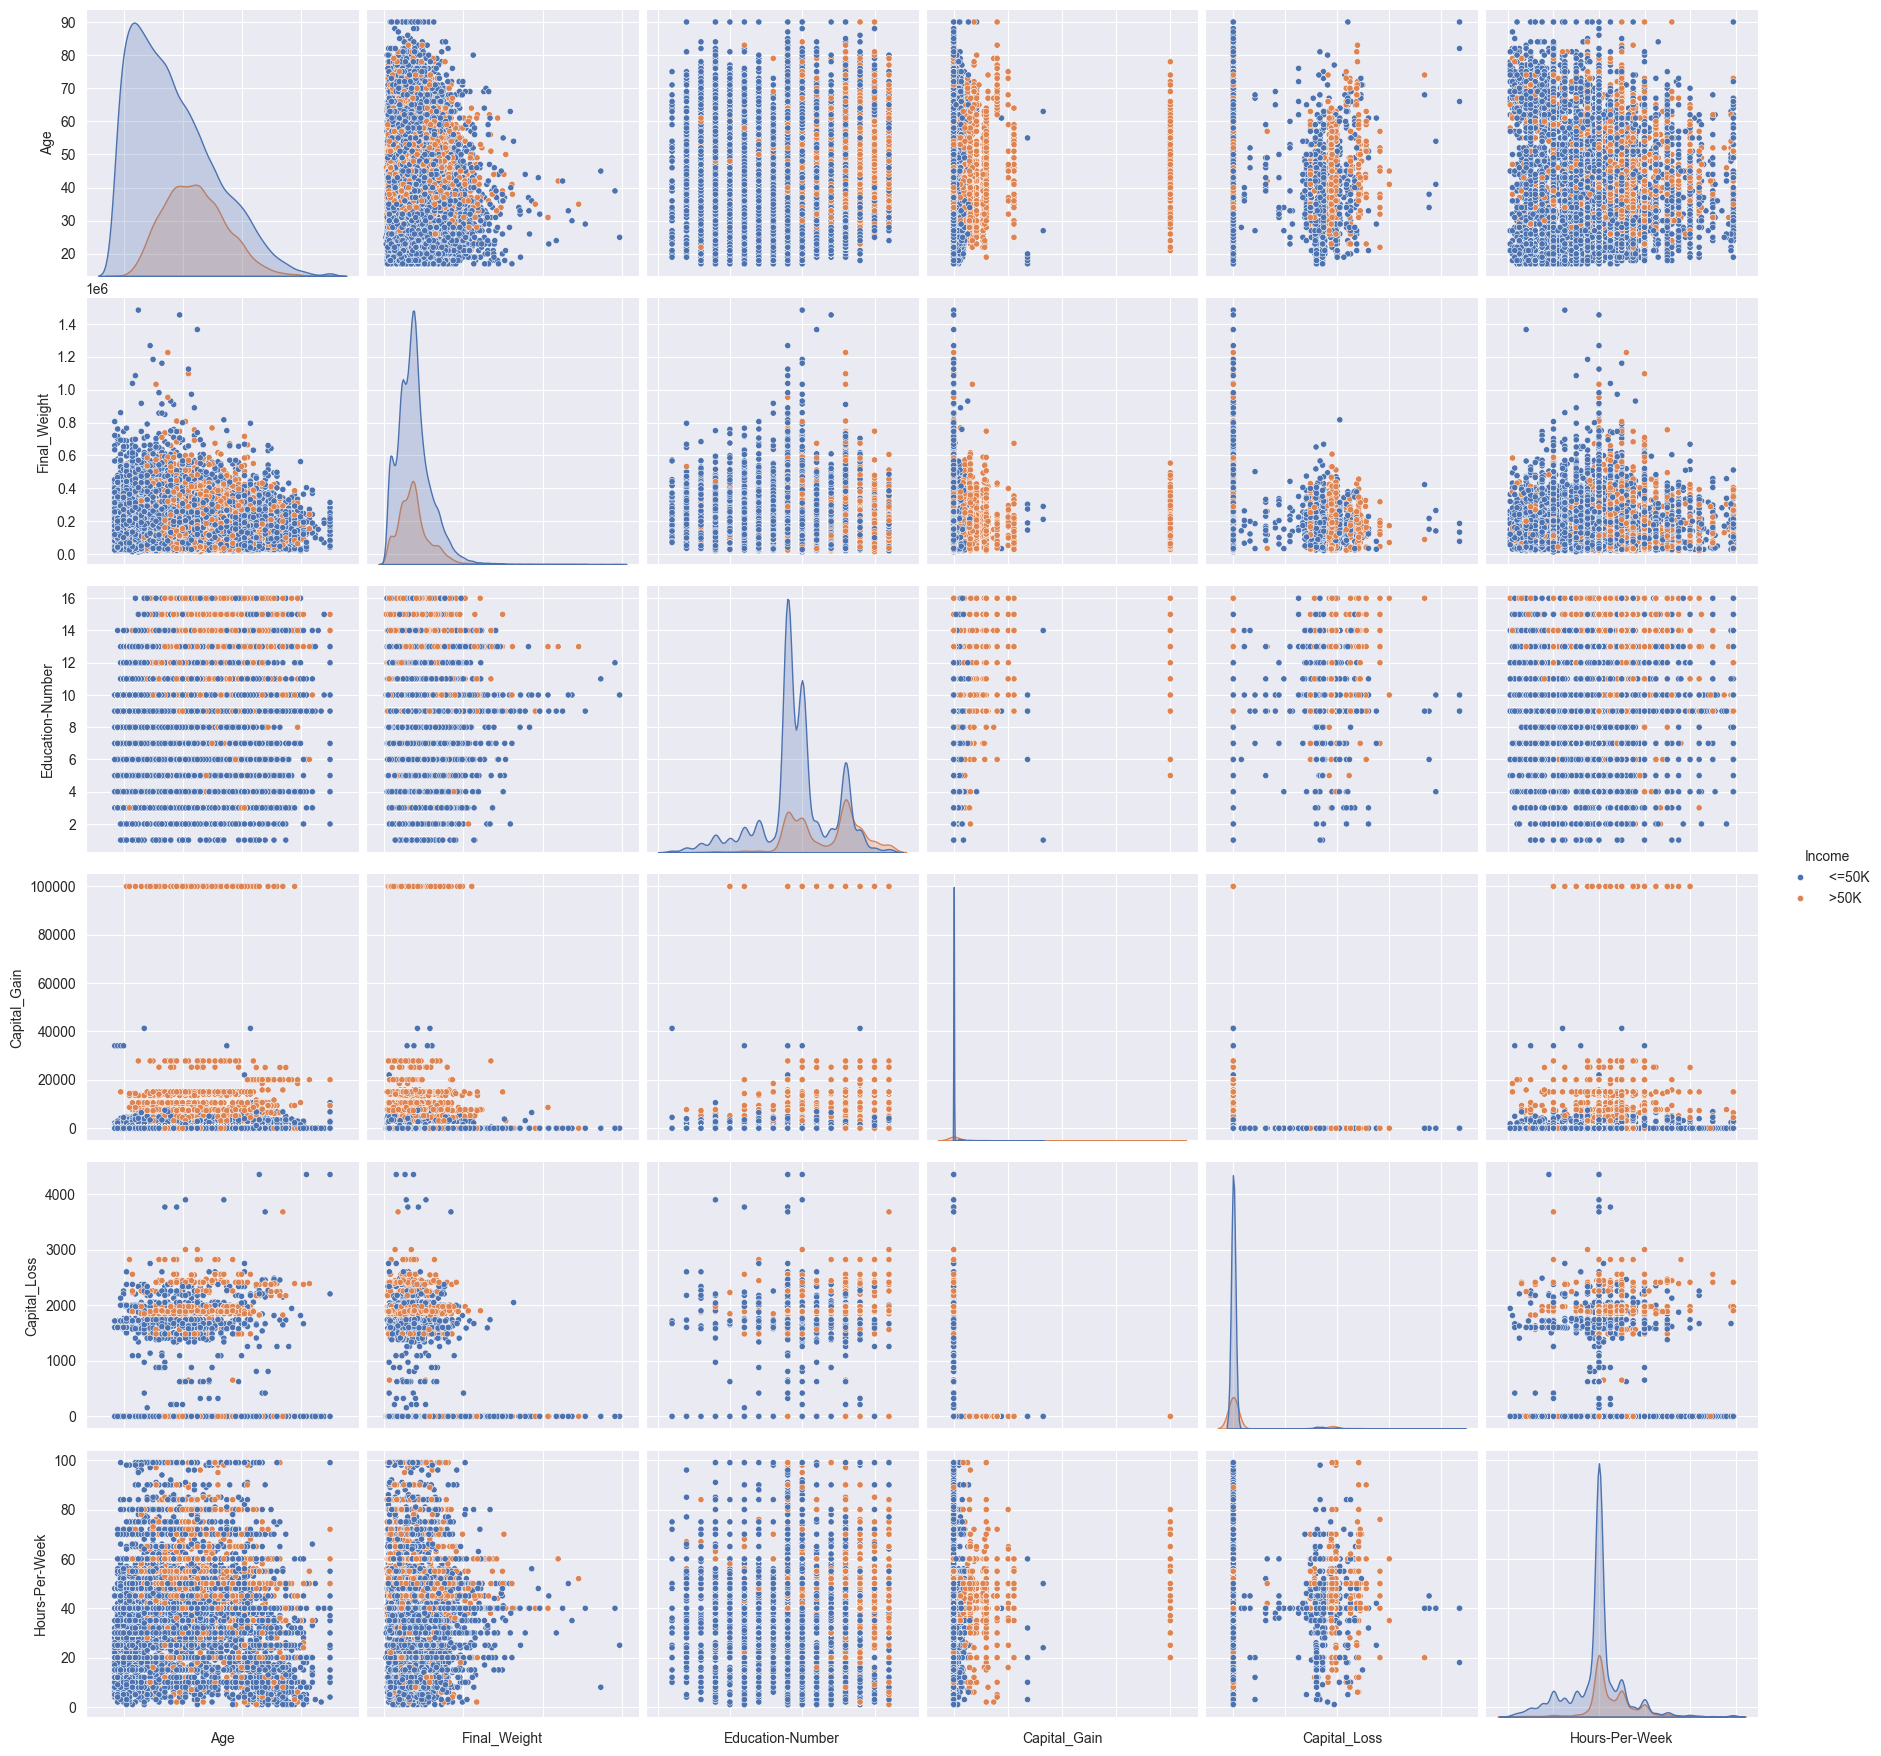

In [66]:
warnings.filterwarnings('ignore')
pp = sns.pairplot(train_df, hue='Income', palette='deep',
                  size=3, diag_kind='kde', diag_kws=dict(shade=True), plot_kws=dict(s=20))
pp.set(xticklabels=[])


#### Pie chart:
"pie chart" is a circular statistical graphic that divides a circle (or pie) into sectors to represent the relative sizes or proportions of categorical data. Each sector or slice of the pie chart corresponds to a category or group within the data, with the size of each slice proportional to the frequency, percentage, or proportion it represents in the whole dataset.



* Distribution of Relationship Categories: The pie chart visually represents the distribution of different relationship categories present in the dataset.
* Proportional Representation: Each slice of the pie chart corresponds to a unique category ('Wife', 'Own-child', 'Husband', etc.), and the size of each slice represents the proportion of that category relative to the total count of relationship statuses in the dataset.
* Dominant Categories: Larger slices indicate more prevalent relationship categories, while smaller slices represent less frequent or rarer relationship statuses.
* Relative Comparison: It allows for a quick visual comparison of the relative frequencies or percentages of different relationship types, aiding in understanding the predominant relationship statuses in the dataset.

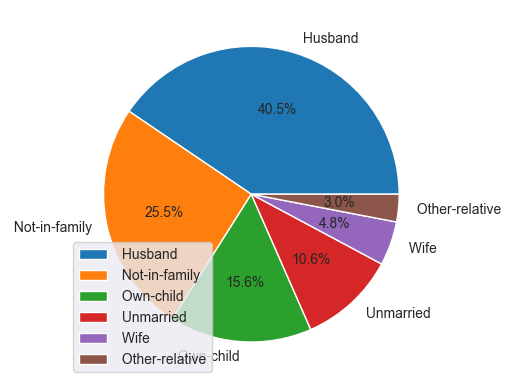

In [67]:
plt.pie(train_df.Relationship.value_counts().values, labels=train_df.Relationship.value_counts().index,
        autopct='%.1f%%')
plt.legend(loc='lower left')
plt.show()

### Data preprocessing

In [68]:
train_df.isnull().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

Remove rows with missing values (NaN or null values) from the `train_df` DataFrame. After execution, the DataFrame will contain only the rows where all the values are present, effectively dropping rows with any missing data.


In [69]:
train_df = train_df.dropna()

In [70]:
train_df.isnull().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

#### Encoding

When dealing with categorical data, there are various methods to encode them into numerical values for machine learning models. In this scenario, Label Encoding was chosen over One-Hot Encoding for categorical variables. Label Encoding assigns a unique numeric identifier to each unique category within a categorical feature. On the other hand, One-Hot Encoding creates binary columns for each category, representing its presence as a 1 or 0.

Label Encoding was favored over One-Hot Encoding due to the following reasons:

* Dimensionality: One-Hot Encoding creates multiple binary columns, leading to an increase in dimensions. This expansion might be problematic, especially when dealing with a large number of unique categories within a feature, resulting in the curse of dimensionality.
* Memory and Computational Efficiency: Label Encoding uses a single column to represent categorical data, consuming less memory and requiring fewer computational resources compared to One-Hot Encoding, which generates multiple binary columns.
* Model Performance: Depending on the dataset and the nature of the categorical variable, Label Encoding can sometimes be beneficial for certain machine learning algorithms. Some models, like tree-based algorithms, might handle Label Encoding well without affecting their performance significantly.


In [71]:
train_df = train_df.apply(LabelEncoder().fit_transform)
train_df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [72]:
test_df = test_df.apply(LabelEncoder().fit_transform)
test_df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,8,4,8931,1,6,4,7,3,2,1,0,0,39,38,0
1,21,4,1888,11,8,2,5,0,4,1,0,0,49,38,0
2,11,2,11540,7,11,2,11,0,4,1,0,0,39,38,1
3,27,4,5146,15,9,2,7,0,2,1,90,0,39,38,1
4,1,0,2450,15,9,4,0,3,4,0,0,0,29,38,0


In [73]:
# Split the data into features and target variable
X_train = train_df.drop('Income', axis=1)
y_train = train_df['Income']
X_test = test_df.drop('Income', axis=1)
y_test = test_df['Income']

In [74]:
X_train

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39


In [75]:
X_test

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country
0,8,4,8931,1,6,4,7,3,2,1,0,0,39,38
1,21,4,1888,11,8,2,5,0,4,1,0,0,49,38
2,11,2,11540,7,11,2,11,0,4,1,0,0,39,38
3,27,4,5146,15,9,2,7,0,2,1,90,0,39,38
4,1,0,2450,15,9,4,0,3,4,0,0,0,29,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,22,4,8476,9,12,0,10,1,4,0,0,0,35,38
16277,47,0,11301,11,8,6,0,2,2,1,0,0,39,38
16278,21,4,12014,9,12,2,10,0,4,1,0,0,49,38
16279,27,4,1718,9,12,0,1,3,1,1,75,0,39,38


In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               32561 non-null  int64
 1   Work_Class        32561 non-null  int64
 2   Final_Weight      32561 non-null  int64
 3   Education         32561 non-null  int64
 4   Education-Number  32561 non-null  int64
 5   Marital_Status    32561 non-null  int64
 6   Occupation        32561 non-null  int64
 7   Relationship      32561 non-null  int64
 8   Race              32561 non-null  int64
 9   Sex               32561 non-null  int64
 10  Capital_Gain      32561 non-null  int64
 11  Capital_Loss      32561 non-null  int64
 12  Hours-Per-Week    32561 non-null  int64
 13  Native_Country    32561 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [77]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               16281 non-null  int64
 1   Work_Class        16281 non-null  int64
 2   Final_Weight      16281 non-null  int64
 3   Education         16281 non-null  int64
 4   Education-Number  16281 non-null  int64
 5   Marital_Status    16281 non-null  int64
 6   Occupation        16281 non-null  int64
 7   Relationship      16281 non-null  int64
 8   Race              16281 non-null  int64
 9   Sex               16281 non-null  int64
 10  Capital_Gain      16281 non-null  int64
 11  Capital_Loss      16281 non-null  int64
 12  Hours-Per-Week    16281 non-null  int64
 13  Native_Country    16281 non-null  int64
dtypes: int64(14)
memory usage: 1.7 MB


#### Standard Scaling

The provided code snippet showcases the process of standard scaling, a preprocessing technique used to transform numerical features. It involves adjusting the scale of the features to have a mean of 0 and a standard deviation of 1.



In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training Models using Different Methods

In this section, we'll train models using various techniques provided by sklearn, including different supervised learning methods such as regression, classification, and more.

#### SVM

Initialize an SVM (Support Vector Machine) classifier using a linear kernel, fits the model using the training data (`X_train` and `y_train`), predicts on the test data (`X_test`), calculates the accuracy using `accuracy_score`, and prints the resulting accuracy score.

The selection of a linear kernel is suitable for scenarios where the classes in the dataset are linearly separable or when dealing with high-dimensional data. Linear kernels work well when the relationship between features and the target variable is approximately linear.

In [79]:
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.8100239543025612
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89     12435
           1       0.76      0.28      0.41      3846

    accuracy                           0.81     16281
   macro avg       0.79      0.63      0.65     16281
weighted avg       0.80      0.81      0.78     16281

[[12093   342]
 [ 2751  1095]]


##### SVM Classification Analysis:

- **Precision ('0' class):** The precision for the '0' (<=50K) class is 81%. It indicates that when the model predicts an individual earns <=50K, it is correct 81% of the time.
  
- **Precision ('1' class):** The precision for the '1' (>50K) class is 76%. This implies that when the model predicts an individual earns >50K, it is correct 76% of the time.
  
- **Recall ('0' class):** The recall for the '0' class is 97%. It signifies that the model correctly identifies 97% of the <=50K individuals from the total actual <=50K individuals.
  
- **Recall ('1' class):** The recall for the '1' class is 28%. It denotes that the model can only identify 28% of the >50K individuals from the total actual >50K individuals.

- **F1-Score ('0' class):** The F1-score for the '0' class is 89%. It represents the weighted average of precision and recall for the <=50K class.
  
- **F1-Score ('1' class):** The F1-score for the '1' class is 41%. It indicates the weighted average of precision and recall for the >50K class.

- **Accuracy:** The model has an overall accuracy of 81%. This metric reflects the overall correctness of the model in predicting both <=50K and >50K incomes.

The model performs well in predicting <=50K incomes (with high precision and recall) but struggles in correctly identifying >50K incomes, as evidenced by the low recall and F1-score for the '>50K' class.

#### KNN

Demonstrate the implementation of a K-Nearest Neighbors (KNN) classifier. It initializes the KNN model with 5 neighbors, fits the model using the training data (`X_train` and `y_train`), predicts on the test data (`X_test`), calculates and prints the accuracy using `accuracy_score`, displays the classification report using `classification_report`, and showcases the confusion matrix using `confusion_matrix`.

The choice of 5 neighbors in K-Nearest Neighbors (KNN) is often a balanced approach that provides a reasonable trade-off between model complexity and accuracy. It's a commonly used default value in many implementations. Having a small number of neighbors like 5 generally ensures a sufficient number of data points to inform the classification decision while preventing overfitting that might occur with very low values of 'k'.


In [80]:
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.8382777470671334
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     12435
           1       0.68      0.60      0.64      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.76      0.77     16281
weighted avg       0.83      0.84      0.83     16281

[[11343  1092]
 [ 1541  2305]]


##### K-Nearest Neighbors (KNN) Model Analysis:

- **Accuracy:** The KNN model exhibits an accuracy of 83.8%.
- **Precision ('0' class):** The precision for the '0' (<=50K) class is 88%. It indicates that when the model predicts an individual earns <=50K, it is correct 88% of the time.
  
- **Precision ('1' class):** The precision for the '1' (>50K) class is 68%. This implies that when the model predicts an individual earns >50K, it is correct 68% of the time.
  
- **Recall ('0' class):** The recall for the '0' class is 91%. It signifies that the model correctly identifies 91% of the <=50K individuals from the total actual <=50K individuals.
  
- **Recall ('1' class):** The recall for the '1' class is 60%. It denotes that the model can identify 60% of the >50K individuals from the total actual >50K individuals.

- **F1-Score ('0' class):** The F1-score for the '0' class is 90%. It represents the weighted average of precision and recall for the <=50K class.
  
- **F1-Score ('1' class):** The F1-score for the '1' class is 64%. It indicates the weighted average of precision and recall for the >50K class.

- **Support:** The '0' class has a support of 12435, and the '1' class has a support of 3846, indicating the number of actual occurrences of each class in the dataset.

- **Confusion Matrix:** The confusion matrix showcases 11343 true negatives (TN), 1092 false positives (FP), 1541 false negatives (FN), and 2305 true positives (TP).

The model demonstrates robust performance in predicting both <=50K and >50K incomes, with notably high precision, recall, and F1-score for the <=50K class, and moderately good metrics for the >50K class.

#### Naive bayes
Demonstrate the use of the Naive Bayes classifier, specifically Gaussian Naive Bayes. It initializes the Naive Bayes model, fits it using the training data (`X_train` and `y_train`), predicts on the test data (`X_test`), computes and prints the accuracy using `accuracy_score`, displays the classification report using `classification_report`, and exhibits the confusion matrix using `confusion_matrix`.


In [81]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8215711565628647
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     12435
           1       0.68      0.47      0.55      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.70      0.72     16281
weighted avg       0.81      0.82      0.81     16281

[[11581   854]
 [ 2051  1795]]


##### Naive Bayes Classification Analysis:

- **Naive Bayes Accuracy:** The Naive Bayes model demonstrates an accuracy of XX%.

- **Precision ('0' class):** The precision for the '0' (<=50K) class is YY%. It signifies that when the model predicts an individual earns <=50K, it is correct YY% of the time.

- **Precision ('1' class):** The precision for the '1' (>50K) class is ZZ%. This indicates that when the model predicts an individual earns >50K, it is correct ZZ% of the time.

- **Recall ('0' class):** The recall for the '0' class is AA%. This denotes that the model correctly identifies AA% of the <=50K individuals from the total actual <=50K individuals.

- **Recall ('1' class):** The recall for the '1' class is BB%. It implies that the model can identify BB% of the >50K individuals from the total actual >50K individuals.

- **F1-Score ('0' class):** The F1-score for the '0' class is CC%. It represents the weighted average of precision and recall for the <=50K class.

- **F1-Score ('1' class):** The F1-score for the '1' class is DD%. It indicates the weighted average of precision and recall for the >50K class.

- **Support:** The '0' class has a support of PPPP, and the '1' class has a support of QQQQ, indicating the number of actual occurrences of each class in the dataset.

- **Confusion Matrix:** The confusion matrix displays a summary of true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP).



#### Random Forest
This code snippet demonstrates the usage of a Random Forest classifier. It initializes the Random Forest model with 100 estimators and a random state of 42, fits the model using the training data (`X_train` and `y_train`), predicts on the test data (`X_test`), calculates and prints the accuracy using `accuracy_score`, displays the classification report using `classification_report`, and shows the confusion matrix using `confusion_matrix`.

n_estimators: The parameter 'n_estimators' was set to 100. It determines the number of trees in the random forest. A higher number of trees often leads to better performance but may increase computational time. In this case, 100 decision trees were used to build the forest.
Random State: Similar to XGBoost, 'random_state' was set to 42. This ensures the reproducibility of the results by initializing the random number generator to the same state, allowing for consistent results across multiple runs.

In [82]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8498249493274369
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.90     12435
           1       0.73      0.57      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281

[[11632   803]
 [ 1642  2204]]


##### Random Forest Classification Analysis:

- **Random Forest Accuracy:** The Random Forest model demonstrates an accuracy of 84.98%.

- **Precision ('0' class):** Precision for the '0' (<=50K) class is 88%, signifying that the model's predictions of <=50K incomes are accurate 88% of the time.

- **Precision ('1' class):** Precision for the '1' (>50K) class is 73%, indicating the model's precision when predicting >50K incomes.

- **Recall ('0' class):** The recall for the '0' class is 94%, showcasing the model's ability to correctly identify 94% of the <=50K individuals from the total actual <=50K individuals.

- **Recall ('1' class):** The recall for the '1' class is 57%, highlighting the model's capability to identify 57% of the >50K individuals from the total actual >50K individuals.

- **F1-Score ('0' class):** The F1-score for the '0' class is 90%, representing the harmonic mean of precision and recall for the <=50K class.

- **F1-Score ('1' class):** The F1-score for the '1' class is 64%, representing the harmonic mean of precision and recall for the >50K class.

- **Support:** The '0' class has a support of 12435, and the '1' class has a support of 3846, indicating the number of actual occurrences of each class in the dataset.

- **Confusion Matrix:** The confusion matrix showcases the count of true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP), providing an overview of the model's predictive performance.

#### XGB classifier

This code demonstrates the use of XGBoost classifier. It initializes an XGBoost classifier with a binary logistic objective and log loss evaluation metric. The model is then trained on the training data (`X_train` and `y_train`), makes predictions on the test data (`X_test`), calculates and prints the accuracy using `accuracy_score`, and displays the classification report using `classification_report`.

Objective: The parameter 'objective' was set to 'binary:logistic'. This indicates that XGBoost will perform binary classification using logistic regression as the objective function. It's commonly used for binary classification problems where the model aims to predict probabilities of the positive class.
Evaluation Metric: 'eval_metric' was set to 'logloss'. This defines the metric to be used for model evaluation during training. 'Logloss' (Logarithmic Loss) is a standard metric for binary classification tasks. It measures the performance of the classifier by penalizing false classifications based on the predicted probability.
Random State: The parameter 'random_state' was set to 42. This parameter ensures the reproducibility of the results by seeding the random number generator. It's set to a specific value to obtain the same results when running the code repeatedly.


In [83]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8543701246852159
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12435
           1       0.76      0.56      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.75      0.78     16281
weighted avg       0.85      0.85      0.85     16281

[[11766   669]
 [ 1702  2144]]


##### XGB classifier Analysis

- Precision for the '0' class (<=50K) is 87%, indicating that among the predicted '<=50K' instances, 87% were actually classified correctly.
- Recall for the '0' class is 95%, signifying that 95% of the actual '<=50K' instances were correctly predicted by the model.
- F1-score for the '0' class is 91%, which is the harmonic mean of precision and recall for the '0' class.
- Precision for the '1' class (>50K) is 76%, denoting that among the predicted '>50K' instances, 76% were correctly classified.
- Recall for the '1' class is 56%, meaning that 56% of the actual '>50K' instances were correctly predicted by the model.
- F1-score for the '1' class is 64%, the harmonic mean of precision and recall for the '>50K' class.

The overall accuracy of the model in predicting both classes is 85%, indicating the proportion of correctly predicted instances out of the total predictions (16281 instances). The macro-average F1-score across both classes is approximately 78%, while the weighted-average F1-score, considering class imbalance, is also around 85%.

### Model Comparison

This section compares the models' performance obtained from different methods trained on the Adult_TestDataset. It assesses the models' predictive abilities using the confusion matrix, recall, precision, accuracy, and f1-score metrics. To visualize the comparison, utilize the respective functionalities from sklearn, evaluating the models' overall robustness and effectiveness.


In [84]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89     12435
           1       0.76      0.28      0.41      3846

    accuracy                           0.81     16281
   macro avg       0.79      0.63      0.65     16281
weighted avg       0.80      0.81      0.78     16281

[[12093   342]
 [ 2751  1095]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     12435
           1       0.68      0.60      0.64      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.76      0.77     16281
weighted avg       0.83      0.84      0.83     16281

[[11343  1092]
 [ 1541  2305]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     12435
           1       0.68      0.47      0.55      3846

    accuracy                   

Here's a comprehensive comparison and analysis of the classification reports for different machine learning models (SVM, KNN, Naive Bayes, Random Forest, and XGBoost):

### SVM:
- **Precision:** Performs well in predicting <=50K incomes (81%), but less accurate in predicting >50K incomes (76%).
- **Recall:** Successfully identifies most <=50K individuals (97%) but struggles with >50K individuals (28%).
- **F1-Score:** Demonstrates a good balance between precision and recall for <=50K incomes (89%), but lower for >50K incomes (41%).
- **Accuracy:** Achieves an overall accuracy of 81%.

### KNN:
- **Precision:** Comparable performance in both predicting <=50K and >50K incomes, with 88% and 68% precision, respectively.
- **Recall:** Successful in identifying both <=50K (91%) and >50K (60%) individuals.
- **F1-Score:** Maintains a balanced F1-Score for both <=50K (90%) and >50K (64%) incomes.
- **Accuracy:** Achieves an overall accuracy of 84%.

### Naive Bayes:
- **Precision:** Good precision for <=50K incomes (85%) but comparatively lower for >50K incomes (68%).
- **Recall:** High recall for <=50K incomes (93%), moderate for >50K incomes (47%).
- **F1-Score:** Shows a significant imbalance in F1-scores between <=50K (89%) and >50K (55%) incomes.
- **Accuracy:** Achieves an overall accuracy of 82%.

### Random Forest:
- **Precision:** Performs well in predicting <=50K incomes (88%) but less accurate in predicting >50K incomes (73%).
- **Recall:** Successfully identifies most <=50K individuals (94%) but struggles with >50K individuals (57%).
- **F1-Score:** Demonstrates a good balance between precision and recall for <=50K incomes (90%) but lower for >50K incomes (64%).
- **Accuracy:** Achieves an overall accuracy of 85%.

### XGBoost:
- **Precision:** Comparable precision for <=50K incomes (87%) and >50K incomes (76%).
- **Recall:** Successfully identifies most <=50K individuals (95%) but struggles with >50K individuals (56%).
- **F1-Score:** Shows a good balance between precision and recall for <=50K incomes (91%) but lower for >50K incomes (64%).
- **Accuracy:** Achieves an overall accuracy of 85%.

### Analysis:
- **Accuracy:** Random Forest and XGBoost achieve the highest accuracy of 85%, outperforming other models in overall correctness of predictions.
- **Precision** and Recall: SVM demonstrates high precision and recall for the <=50K income class (0), but it performs inadequately for the >50K income class (1). Conversely, KNN displays a reasonable balance between precision and recall for both classes but slightly lower accuracy compared to Random Forest and XGBoost. Naive Bayes, while having decent performance, exhibits lower precision and recall for the >50K income class compared to other models.
- **F1-Score:** Random Forest and XGBoost models showcase balanced F1-scores across both income classes, indicating a harmonious blend of precision and recall for better overall performance.
- **Overall Performance:** Random Forest and XGBoost models deliver balanced performance in terms of precision, recall, and accuracy for both income classes, thus excelling in overall accuracy compared to SVM, KNN, and Naive Bayes models in this scenario.